In [17]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import svm,tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import supervisedLearning_commons
from sklearn.linear_model import LogisticRegression


from matplotlib.colors import ListedColormap

In [3]:
def oneHotEncoding(train, numeric_cols):
    # receives the clean tain and test data
    # in: train and test numpy matrix
    x_num_train = train[numeric_cols].as_matrix()
    #x_num_test = test[numeric_cols].as_matrix()
    cat_train = train.drop(numeric_cols, axis=1)
    #cat_test = test.drop(numeric_cols, axis=1)
    x_cat_train = cat_train.T.to_dict().values()
    #x_cat_test = cat_test.T.to_dict().values()
    # 5.1 vectorize
    vectorizer = DV(sparse=False)
    vec_x_cat_train = vectorizer.fit_transform(x_cat_train)
    #vec_x_cat_test = vectorizer.transform(x_cat_test)
    # complete x
    x_train = np.hstack((x_num_train, vec_x_cat_train))
    #x_test = np.hstack((x_num_test, vec_x_cat_test))
    return x_train

def randomization_train_2_twoSet(x_train,y_train,PRC):
    #Alternative:
    #from sklearn.cross_validation import train_test_split
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    perm = np.random.permutation(x_train.shape[0])
    split_point = int(np.ceil(y_train.shape[0]*PRC))

    X_train = x_train[perm[:split_point].ravel(),:]
    Y_train = y_train[perm[:split_point].ravel()]

    X_test = x_train[perm[split_point:].ravel(),:]
    Y_test = y_train[perm[split_point:].ravel()]

    return (X_train, Y_train, X_test, Y_test)


In [103]:
#1.Read DAta
path_data = '/Users/mirta/BIGDATA/PROJECT/ADHD_Project-master/SupervisedLearning/data_for_learning/'
train = pd.read_csv(path_data+'SupervisedLearningDataSet_Lunes11.csv')

train = train[train.experiment == 'B']

In [104]:
train.head()

,Unnamed: 0,BPR_C3,BPR_C4,BPR_Cz,BPR_F3,BPR_F4,BPR_Fp1,BPR_Fp2,BPR_Fz,C3_(Alpha),...,Fz_(Beta_Global),Fz_(Gamma),Fz_(Theta),Fz_(Theta2+Alpha1),experiment,norm64comp_PCA_x,norm64comp_PCA_y,norm64comp_PCA_z,patientName,Best_Cluster
0,0,16.554281,6.789196,20.152363,9.927679,13.822268,9.465081,10.287247,0.000000,1.781468,...,0.000000,0.000000,0.000000,0.000000,B,-0.530249,-3.289800,1.370542,S100_B,1
2,2,19.213702,24.777468,25.793031,14.806750,15.325136,10.182399,12.103343,15.733937,1.289775,...,0.457749,0.159458,4.923992,2.601960,B,1.905199,-6.992737,0.310811,S101_B,1
5,5,13.408050,21.453597,23.529602,11.064114,14.225991,11.041689,10.486719,16.418801,2.351850,...,0.373856,0.211185,3.869544,3.144678,B,1.225918,-0.075368,1.469183,S102_B,1
7,7,22.739612,15.554675,23.285264,23.821072,12.947290,13.554576,13.480529,13.433892,1.937868,...,0.515978,0.235098,3.978490,3.034652,B,1.211349,-3.472660,-0.778755,S103_B,1
10,10,20.104660,16.025724,25.382202,18.209489,16.298085,15.717418,13.721229,20.871859,1.616361,...,0.462846,0.193141,4.436727,3.184091,B,0.718661,-4.954779,-1.124442,S104_B,1


In [105]:
y= train['Best_Cluster'].values

In [106]:
print y

[1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0]


In [107]:
###################################################drop Cols
numeric_cols=['Fp1_(Theta2+Alpha1)', 'Fp1_(Theta)', 'Fp1_(Alpha)',
       'Fp1_(Beta_Global)', 'Fp1_(Beta_Alta)', 'Fp1_(Beta_Baja)',
       'Fp1_(Gamma)', 'F3_(Theta2+Alpha1)', 'F3_(Theta)', 'F3_(Alpha)',
       'F3_(Beta_Global)', 'F3_(Beta_Alta)', 'F3_(Beta_Baja)', 'F3_(Gamma)',
       'C3_(Theta2+Alpha1)', 'C3_(Theta)', 'C3_(Alpha)', 'C3_(Beta_Global)',
       'C3_(Beta_Alta)', 'C3_(Beta_Baja)', 'C3_(Gamma)', 'Fz_(Theta2+Alpha1)',
       'Fz_(Theta)', 'Fz_(Alpha)', 'Fz_(Beta_Global)', 'Fz_(Beta_Alta)',
       'Fz_(Beta_Baja)', 'Fz_(Gamma)', 'Cz_(Theta2+Alpha1)', 'Cz_(Theta)',
       'Cz_(Alpha)', 'Cz_(Beta_Global)', 'Cz_(Beta_Alta)', 'Cz_(Beta_Baja)',
       'Cz_(Gamma)', 'Fp2_(Theta2+Alpha1)', 'Fp2_(Theta)', 'Fp2_(Alpha)',
       'Fp2_(Beta_Global)', 'Fp2_(Beta_Alta)', 'Fp2_(Beta_Baja)',
       'Fp2_(Gamma)', 'F4_(Theta2+Alpha1)', 'F4_(Theta)', 'F4_(Alpha)',
       'F4_(Beta_Global)', 'F4_(Beta_Alta)', 'F4_(Beta_Baja)', 'F4_(Gamma)',
       'C4_(Theta2+Alpha1)', 'C4_(Theta)', 'C4_(Alpha)', 'C4_(Beta_Global)',
       'C4_(Beta_Alta)', 'C4_(Beta_Baja)', 'C4_(Gamma)', 'BPR_Fp1', 'BPR_F3',
       'BPR_C3', 'BPR_Fz', 'BPR_Cz', 'BPR_Fp2', 'BPR_F4', 'BPR_C4']

In [108]:
X = oneHotEncoding(train, numeric_cols) 

In [104]:
## Separate train and test
#PRC=0.3
#X_train, y_train, X_test, y_test = randomization_train_2_twoSet(X,y,PRC=PRC)

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print X_train.size
print y_train.size
print X_test.size
print y_test.size
print X.size
print y.size


18584
92
8080
40
26664
132


# SVM

In [111]:
print ("Training SVM...")
C = 20
gamma = 1.31e-5
shrinking = True
probability = True
verbose = True
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)

svc = SVC( C = C, gamma = gamma, shrinking = shrinking, probability = probability, verbose = verbose,class_weight='balanced')

Training SVM...


In [113]:
svc.fit(X_train, y_train)

[LibSVM]

SVC(C=20, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.31e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [114]:
#x_test = scaler.transform(x_test)
my_prediction = svc.predict(X_test)

print ('SVM results ')
print my_prediction
print ('True values')
print y_test
print ('Performance Evaluation')

SVM results 
[1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0]
True values
[1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1]
Performance Evaluation


In [115]:
# Using k-fold cross validations

n_folds = 10
kf=cross_validation.KFold(n=y.shape[0], n_folds=n_folds, shuffle=False, random_state=0)
acc = np.zeros((n_folds,))
f1 = np.zeros((n_folds,))
precision = np.zeros((n_folds,))
recall = np.zeros((n_folds,))
i = 0
X = X
y = y
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #dt = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
#    svc = SVC( C = C, gamma = gamma, shrinking = shrinking, probability = probability, verbose = verbose,class_weight='balanced')
    svc = svm.SVC(C=C,kernel='rbf',class_weight='balanced')        
    svc.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = svc.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    f1[i]  = metrics.f1_score(yhat[test_index], y_test)
    precision[i] = metrics.precision_score(yhat[test_index], y_test)
    recall[i] = metrics.recall_score(yhat[test_index], y_test)
    i=i+1

print ('SVM mean accuracy: '+ str(np.mean(acc)))
print ('SVM mean F1-Score: '+ str(np.mean(f1)))
print ('SVM mean precision: '+ str(np.mean(precision)))
print ('SVM mean recall: '+ str(np.mean(recall)))

SVM mean accuracy: 0.976923076923
SVM mean F1-Score: 0.981162181472
SVM mean precision: 0.978888888889
SVM mean recall: 0.985714285714


In [116]:
n_loo=y.size
loo=cross_validation.LeaveOneOut(n_loo)

acc = np.zeros((n_loo,))
f1 = np.zeros((n_loo,))
precision = np.zeros((n_loo,))
recall = np.zeros((n_loo,))
i = 0
X = X
y = y
yhat = y.copy()
for train_index, test_index in loo:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #dt = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
#    svc = SVC( C = C, gamma = gamma, shrinking = shrinking, probability = probability, verbose = verbose,class_weight='balanced')
    svc = svm.SVC(C=C,kernel='rbf',class_weight='balanced')        
    svc.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = svc.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    f1[i]  = metrics.f1_score(yhat[test_index], y_test)
    precision[i] = metrics.precision_score(yhat[test_index], y_test)
    recall[i] = metrics.recall_score(yhat[test_index], y_test)
    i=i+1

print ('SVM mean accuracy: '+ str(np.mean(acc)))
print ('SVM mean F1-Score: '+ str(np.mean(f1)))
print ('SVM mean precision: '+ str(np.mean(precision)))
print ('SVM mean recall: '+ str(np.mean(recall)))

/Users/mirta/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/mirta/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


SVM mean accuracy: 0.984848484848
SVM mean F1-Score: 0.69696969697
SVM mean precision: 0.69696969697
SVM mean recall: 0.69696969697


# plots

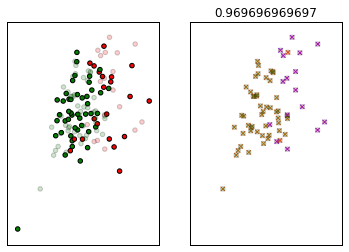

In [118]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

## plot grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#008000'])
cm_dark = ListedColormap(['#8A2BE2','#D2691E'])

%matplotlib inline

ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())


ax = plt.subplot(1, 2, 2)

svc = svm.SVC(C=1,kernel='rbf',class_weight='balanced')        
svc.fit(X_train,y_train)

score = svc.score(X_test, y_test)

y_predict=svc.predict(X_test)

        # Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, cmap=cm_dark,marker='x')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.2)



ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(score)

#plt.figure()

In [120]:
print y_test-y_predict

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


# RANDOM FOREST

In [121]:
PRC=0.7
X_train, y_train, X_test, y_test = randomization_train_2_twoSet(X,y,PRC=PRC)

In [122]:
print ('Training Random Forest ..')
n_estimators = 51
max_depth = 12
min_samples_split = 2
random_state = 1
max_features = 'auto'
verbose = 1
n_jobs = 1

w_0 = y_train[np.where(y_train==0)].shape[0] / y_train.shape[0]
w_1 = y_train[np.where(y_train==1)].shape[0] / y_train.shape[0]

#class_weight = {0:w_1,1:w_0}
class_weight = 'balanced'


Training Random Forest ..


In [123]:
#normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
forest = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
##forest = RandomForestClassifier(n_estimators=n_estimators,max_depth = max_depth,min_samples_split=min_samples_split,class_weight=class_weight)
my_forest = forest.fit(X_train,y_train)
print ('Random forest training score ',my_forest.score(X_train,y_train))
print my_forest
#

('Random forest training score ', 1.0)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


In [124]:
## Using k-fold cross validation to measure performance
n_folds = 10
kf=cross_validation.KFold(n=y_train.shape[0], n_folds=n_folds, shuffle=False, random_state=0)

acc = np.zeros((n_folds,))
precision = np.zeros((n_folds,))
recall = np.zeros((n_folds,))
#thresholds = np.zeros((n_folds,))
f1 = np.zeros((n_folds,))
i = 0
X = X
y = y
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
    
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    precision[i] = metrics.precision_score(yhat[test_index], y_test)
    recall[i] = metrics.recall_score(yhat[test_index], y_test)
    f1[i]  = metrics.f1_score(yhat[test_index], y_test)
    i=i+1

print ('Random Forest mean accuracy: '+ str(np.mean(acc)))
print ('Random Forest mean F1-Score: '+ str(np.mean(f1)))
print ('Random Forest mean precision: '+ str(np.mean(precision)))
print ('Random Forest mean recall: '+ str(np.mean(recall)))


Random Forest mean accuracy: 0.968888888889
Random Forest mean F1-Score: 0.977334430276
Random Forest mean precision: 0.983333333333
Random Forest mean recall: 0.974603174603


# plots

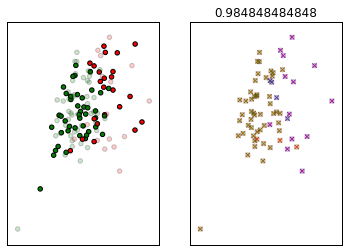

In [125]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

## plot grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#008000'])
cm_dark = ListedColormap(['#8A2BE2','#D2691E'])

%matplotlib inline

ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())


ax = plt.subplot(1, 2, 2)

dt = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
    
dt.fit(X_train,y_train)

score = svc.score(X_test, y_test)

y_predict=dt.predict(X_test)

        # Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, cmap=cm_dark,marker='x')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.2)



ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(score)

#plt.figure()

# LOGISTIC REGRESSION

In [137]:
print ('Logistic Regresion..')

Logistic Regresion..


In [165]:
n_folds = 10
kf=cross_validation.KFold(n=y.shape[0], n_folds=n_folds, shuffle=False, random_state=0)

acc = np.zeros((n_folds,))
f1 = np.zeros((n_folds,))
precision = np.zeros((n_folds,))
recall = np.zeros((n_folds,))
i = 0
X = X
y = y
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = LogisticRegression()
    
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    f1[i]  = metrics.f1_score(yhat[test_index], y_test)
    precision[i] = metrics.precision_score(yhat[test_index], y_test)
    recall[i] = metrics.recall_score(yhat[test_index], y_test)

    i=i+1

print ('Logistic regresion accuracy: '+ str(np.mean(acc)))
print ('Logistic regression F1-Score: '+ str(np.mean(f1)))
print ('Logistic regression precision: '+ str(np.mean(precision)))
print ('Logistic regression recall: '+ str(np.mean(recall)))


Logistic regresion accuracy: 0.969230769231
Logistic regression F1-Score: 0.976339869281
Logistic regression precision: 0.9675
Logistic regression recall: 0.988888888889


In [80]:
n_loo=y.size
loo=cross_validation.LeaveOneOut(n_loo)

acc = np.zeros((n_loo,))
f1 = np.zeros((n_loo,))
precision = np.zeros((n_loo,))
recall = np.zeros((n_loo,))
i = 0
X = X
y = y
yhat = y.copy()
for train_index, test_index in loo:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #dt = RandomForestClassifier(max_depth = max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state = random_state,class_weight=class_weight)
#    svc = SVC( C = C, gamma = gamma, shrinking = shrinking, probability = probability, verbose = verbose,class_weight='balanced')
    dt = LogisticRegression()
    
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = svc.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    f1[i]  = metrics.f1_score(yhat[test_index], y_test)
    precision[i] = metrics.precision_score(yhat[test_index], y_test)
    recall[i] = metrics.recall_score(yhat[test_index], y_test)
    i=i+1

print ('SVM mean accuracy: '+ str(np.mean(acc)))
print ('SVM mean F1-Score: '+ str(np.mean(f1)))
print ('SVM mean precision: '+ str(np.mean(precision)))
print ('SVM mean recall: '+ str(np.mean(recall)))

/Users/mirta/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mirta/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM mean accuracy: 0.628787878788
SVM mean F1-Score: 0.606060606061
SVM mean precision: 0.606060606061
SVM mean recall: 0.606060606061


# plots

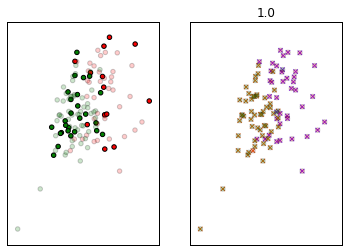

In [84]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7)

## plot grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#008000'])
cm_dark = ListedColormap(['#8A2BE2','#D2691E'])

%matplotlib inline

ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())


ax = plt.subplot(1, 2, 2)

dt = LogisticRegression()
    
dt.fit(X_train,y_train)

score = svc.score(X_test, y_test)

y_predict=dt.predict(X_test)

        # Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, cmap=cm_dark,marker='x')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.2,marker='o')



ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(score)

#plt.figure()

In [101]:
#1.Read DAta
path_data = '/Users/mirta/BIGDATA/PROJECT/ADHD_Project-master/SupervisedLearning/data_for_learning/'
train = pd.read_csv(path_data+'SupervisedLearningDataSet_Lunes11.csv')

train = train[train.experiment == 'B']

In [102]:
train.size

9372